In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
import pickle
sns.set(rc={"figure.figsize": [9,9]}, font_scale=1.5)

In [4]:
df=pd.read_csv(r"C:\Users\omara\OneDrive\Desktop\DATA_SCIENCE_COURSE\final project\hotel reservation data set .csv")

In [5]:
df.sample(5)

Booking_ID  number of adults  number of children  \
18912   INN18913                 1                   0   
28048   INN28049                 2                   0   
35090   INN35091                 2                   0   
24963   INN24964                 2                   0   
30227   INN30228                 2                   0   

       number of weekend nights  number of week nights type of meal  \
18912                         0                      2  Meal Plan 1   
28048                         2                      3  Meal Plan 1   
35090                         2                      1  Meal Plan 1   
24963                         0                      2  Meal Plan 1   
30227                         1                      1  Meal Plan 1   

       car parking space    room type  lead time market segment type  \
18912                  0  Room_Type 1        164             Offline   
28048                  0  Room_Type 1         71              Online   
35090                  0  Room_Type 1         90              Online   
24963                  0  Room_Type 1         56              Online   
30227                  0  Room_Type 1        180             Offline   

       repeated  P-C  P-not-C  average price   special requests  \
18912         0    0        0          100.00                 0   
28048         0    0        0          107.10                 0   
35090         0    0        0           89.25                 0   
24963         0    0        0           69.60                 0   
30227         0    0        0          100.00                 1   

      date of reservation booking status  
18912           10/2/2017   Not_Canceled  
28048           6/26/2018       Canceled  
35090           9/13/2017       Canceled  
24963           2/26/2018       Canceled  
30227            5/2/2018   Not_Canceled

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [8]:
df.columns=df.columns.str.strip().str.replace(" ","_").str.replace("-","_").str.lower()


In [9]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p_c                       36285 non-null  int64  
 12  p_not_c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [11]:
df=df.convert_dtypes()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  string 
 1   number_of_adults          36285 non-null  Int64  
 2   number_of_children        36285 non-null  Int64  
 3   number_of_weekend_nights  36285 non-null  Int64  
 4   number_of_week_nights     36285 non-null  Int64  
 5   type_of_meal              36285 non-null  string 
 6   car_parking_space         36285 non-null  Int64  
 7   room_type                 36285 non-null  string 
 8   lead_time                 36285 non-null  Int64  
 9   market_segment_type       36285 non-null  string 
 10  repeated                  36285 non-null  Int64  
 11  p_c                       36285 non-null  Int64  
 12  p_not_c                   36285 non-null  Int64  
 13  average_price             36285 non-null  Float64
 14  specia

In [13]:
df.head(5)

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  p_c  p_not_c  average_price  \
0        224             Offline         0    0        0           88.0   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0           50.0   
3        211              Online         0    0        0          100.0   
4         48              Online         0    0        0           77.0   

   special_requests date_of_reservation booking_status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [14]:
df["number_of_total_individuals"]=df["number_of_adults"]+df["number_of_children"]
df["number_of_nights"]=df["number_of_week_nights"]+df["number_of_weekend_nights"]


In [15]:
df.head()

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  p_c  p_not_c  average_price  \
0        224             Offline         0    0        0           88.0   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0           50.0   
3        211              Online         0    0        0          100.0   
4         48              Online         0    0        0           77.0   

   special_requests date_of_reservation booking_status  \
0                 0           10/2/2015   Not_Canceled   
1                 1           11/6/2018   Not_Canceled   
2                 0           2/28/2018       Canceled   
3                 1           5/20/2017       Canceled   
4                 0           4/11/2018       Canceled   

   number_of_total_individuals  number_of_nights  
0                            2                 7  
1                            1                 4  
2                            3                 4  
3                            1                 2  
4                            1                 3

In [16]:
df["date_of_reservation"]=pd.to_datetime(df["date_of_reservation"],format='%m/%d/%Y',errors="coerce")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36285 non-null  string        
 1   number_of_adults             36285 non-null  Int64         
 2   number_of_children           36285 non-null  Int64         
 3   number_of_weekend_nights     36285 non-null  Int64         
 4   number_of_week_nights        36285 non-null  Int64         
 5   type_of_meal                 36285 non-null  string        
 6   car_parking_space            36285 non-null  Int64         
 7   room_type                    36285 non-null  string        
 8   lead_time                    36285 non-null  Int64         
 9   market_segment_type          36285 non-null  string        
 10  repeated                     36285 non-null  Int64         
 11  p_c                          36285 non-nu

In [18]:
df.isna().sum()

booking_id                      0
number_of_adults                0
number_of_children              0
number_of_weekend_nights        0
number_of_week_nights           0
type_of_meal                    0
car_parking_space               0
room_type                       0
lead_time                       0
market_segment_type             0
repeated                        0
p_c                             0
p_not_c                         0
average_price                   0
special_requests                0
date_of_reservation            37
booking_status                  0
number_of_total_individuals     0
number_of_nights                0
dtype: int64

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36248 non-null  string        
 1   number_of_adults             36248 non-null  Int64         
 2   number_of_children           36248 non-null  Int64         
 3   number_of_weekend_nights     36248 non-null  Int64         
 4   number_of_week_nights        36248 non-null  Int64         
 5   type_of_meal                 36248 non-null  string        
 6   car_parking_space            36248 non-null  Int64         
 7   room_type                    36248 non-null  string        
 8   lead_time                    36248 non-null  Int64         
 9   market_segment_type          36248 non-null  string        
 10  repeated                     36248 non-null  Int64         
 11  p_c                          36248 non-null  I

In [21]:
df.isna().sum()

booking_id                     0
number_of_adults               0
number_of_children             0
number_of_weekend_nights       0
number_of_week_nights          0
type_of_meal                   0
car_parking_space              0
room_type                      0
lead_time                      0
market_segment_type            0
repeated                       0
p_c                            0
p_not_c                        0
average_price                  0
special_requests               0
date_of_reservation            0
booking_status                 0
number_of_total_individuals    0
number_of_nights               0
dtype: int64

In [22]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights'],
      dtype='object')

In [23]:
df["day_name"]=df["date_of_reservation"].dt.day_name()
df["month"]=df["date_of_reservation"].dt.month
df["year"]=df["date_of_reservation"].dt.year


In [24]:
df.head()

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  ...  p_not_c  average_price  \
0        224             Offline  ...        0           88.0   
1          5              Online  ...        0         106.68   
2          1              Online  ...        0           50.0   
3        211              Online  ...        0          100.0   
4         48              Online  ...        0           77.0   

   special_requests  date_of_reservation  booking_status  \
0                 0           2015-10-02    Not_Canceled   
1                 1           2018-11-06    Not_Canceled   
2                 0           2018-02-28        Canceled   
3                 1           2017-05-20        Canceled   
4                 0           2018-04-11        Canceled   

  number_of_total_individuals number_of_nights   day_name  month  year  
0                           2                7     Friday     10  2015  
1                           1                4    Tuesday     11  2018  
2                           3                4  Wednesday      2  2018  
3                           1                2   Saturday      5  2017  
4                           1                3  Wednesday      4  2018  

[5 rows x 22 columns]

In [25]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [26]:
df["type_of_meal"].unique()

<StringArray>
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Length: 4, dtype: string

In [27]:
df["room_type"].unique()

<StringArray>
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5',
 'Room_Type 7', 'Room_Type 3']
Length: 7, dtype: string

In [28]:
df["market_segment_type"].unique()

<StringArray>
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Length: 5, dtype: string

In [29]:
df["special_requests"].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [30]:
df["booking_status"].unique()

<StringArray>
['Not_Canceled', 'Canceled']
Length: 2, dtype: string

In [31]:
df["number_of_total_individuals"].unique()

<IntegerArray>
[2, 1, 3, 4, 5, 12, 10, 11]
Length: 8, dtype: Int64

In [32]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [33]:
df.drop(["booking_id","number_of_adults","number_of_children","number_of_weekend_nights","number_of_week_nights","date_of_reservation"],axis=1,inplace=True)

In [34]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

<Axes: >

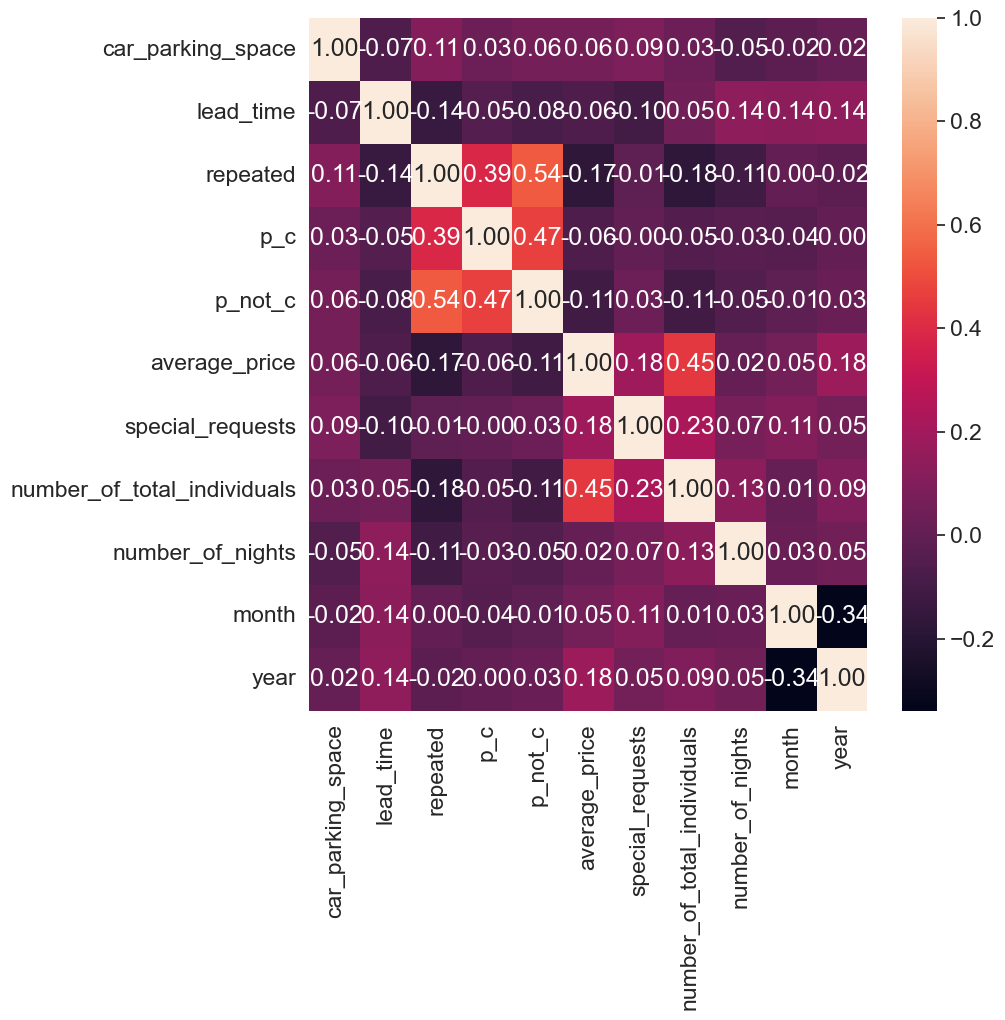

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

<Axes: >

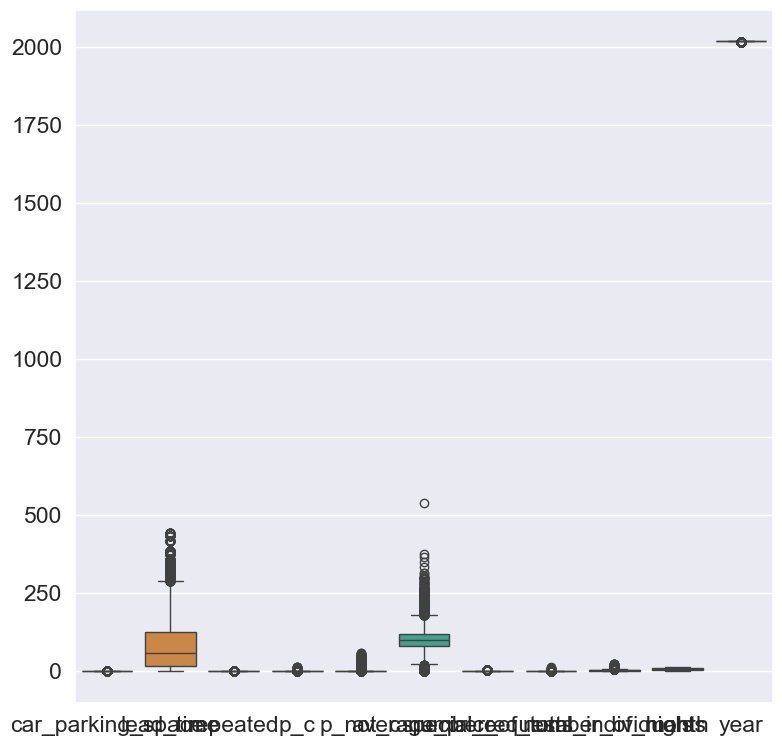

In [36]:
sns.boxplot(df)

In [37]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [38]:
px.box(df,x=df["average_price"])

In [39]:
df[df["average_price"]==df["average_price"].max()]

type_of_meal  car_parking_space    room_type  lead_time  \
33114  Meal Plan 1                  0  Room_Type 1         35   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
33114             Offline         0    0        0          540.0   

       special_requests booking_status  number_of_total_individuals  \
33114                 0       Canceled                            2   

       number_of_nights day_name  month  year  
33114                 1   Sunday      3  2018

In [40]:
df[df["average_price"]>=179.5].shape[0]

1067

In [41]:
df[df["average_price"]==375.5]

type_of_meal  car_parking_space    room_type  lead_time  \
9461  Meal Plan 1                  0  Room_Type 4         21   

     market_segment_type  repeated  p_c  p_not_c  average_price  \
9461              Online         0    0        0          375.5   

      special_requests booking_status  number_of_total_individuals  \
9461                 0   Not_Canceled                            3   

      number_of_nights day_name  month  year  
9461                 2   Sunday     12  2018

In [42]:
df[df["average_price"]>=179.5].year.unique()

array([2018, 2017])

In [43]:
df.groupby("year")[["average_price"]].mean()

average_price
year               
2015           88.0
2016          100.0
2017      90.032118
2018     106.373606

In [44]:
index=detect_outliers(df,0,["average_price"])
df.loc[index, "average_price"] = df["average_price"].median()

In [45]:
px.box(df,x=df["average_price"])

In [46]:
px.box(df,x=df["lead_time"])

In [47]:
df[df["lead_time"]>=290].shape[0]

1332

In [48]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Not_Canceled")].shape[0]

262

In [49]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Canceled")].shape[0]

1070

In [50]:
df["lead_time"].nunique()

352

In [51]:
px.histogram(df,x=df["lead_time"])

In [52]:
df.groupby(df["lead_time"])[["lead_time"]].count()

lead_time
lead_time           
0               1295
1               1078
2                643
3                626
4                627
...              ...
381                2
386               69
418               60
433               20
443               22

[352 rows x 1 columns]

In [53]:
def leadtimehandling(leadtime):
    if leadtime <= 1:
        return "Same Day"
    elif leadtime <= 7:
        return "Short Notice"
    elif leadtime <=30 :
        return "Medium Term"
    elif leadtime <= 365 :
        return "Long Term"
    else:
         return "Very Long Term"

df["lead_time"]=df["lead_time"].apply(leadtimehandling)

In [54]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  repeated  p_c  p_not_c  average_price  \
0             Offline         0    0        0           88.0   
1              Online         0    0        0         106.68   
2              Online         0    0        0           50.0   
3              Online         0    0        0          100.0   
4              Online         0    0        0           77.0   

   special_requests booking_status  number_of_total_individuals  \
0                 0   Not_Canceled                            2   
1                 1   Not_Canceled                            1   
2                 0       Canceled                            3   
3                 1       Canceled                            1   
4                 0       Canceled                            1   

   number_of_nights   day_name  month  year  
0                 7     Friday     10  2015  
1                 4    Tuesday     11  2018  
2                 4  Wednesday      2  2018  
3                 2   Saturday      5  2017  
4                 3  Wednesday      4  2018

In [55]:
df["lead_time"].unique()

array(['Long Term', 'Short Notice', 'Same Day', 'Medium Term',
       'Very Long Term'], dtype=object)

In [56]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

<Axes: >

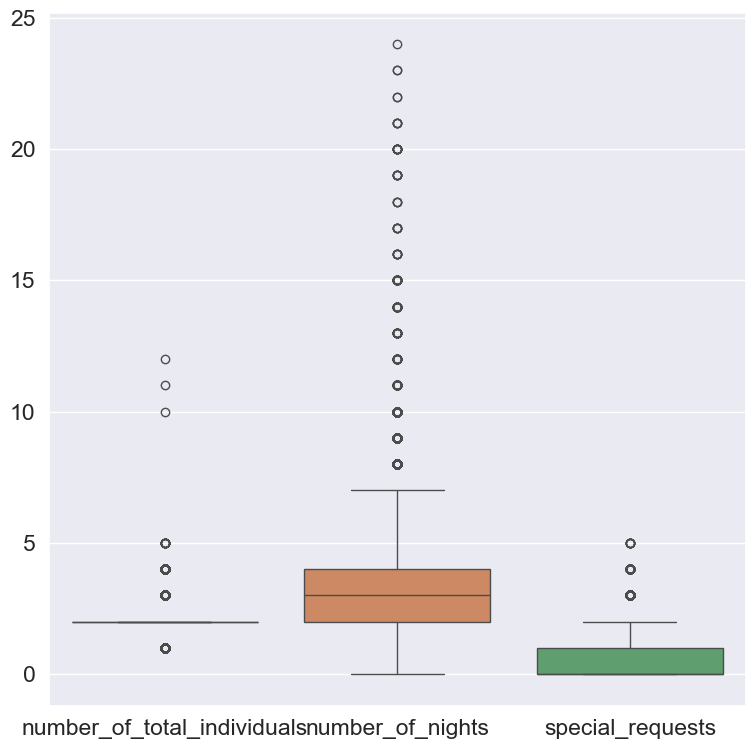

In [57]:
sns.boxplot(df[["number_of_total_individuals","number_of_nights","special_requests"]])

In [58]:
px.box(df,x=df["number_of_nights"])

In [59]:
df[df["number_of_nights"]==24]

type_of_meal  car_parking_space    room_type  lead_time  \
19512  Meal Plan 1                  0  Room_Type 1  Long Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
19512              Online         0    0        0          90.95   

       special_requests booking_status  number_of_total_individuals  \
19512                 1       Canceled                            2   

       number_of_nights   day_name  month  year  
19512                24  Wednesday      7  2018

In [60]:
sorted(df["number_of_nights"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [61]:
df.groupby(df["number_of_nights"])["p_c"].count()

number_of_nights
0        78
1      6600
2      8467
3     10042
4      5887
5      2590
6      1028
7       974
8       179
9       111
10      108
11       39
12       24
13       18
14       32
15       31
16        6
17        5
18        3
19        6
20       11
21        4
22        2
23        2
24        1
Name: p_c, dtype: Int64

In [62]:
def stay_bin(x):
    if x == 0:
        return "Day Use"
    elif x <= 3:
        return "Short Stay"
    elif x <= 7:
        return "Week Stay"
    elif x <= 14:
        return "Two Weeks Stay"
    else:
        return "Long Stay"
df["number_of_nights"] = df["number_of_nights"].apply(stay_bin)


In [63]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  repeated  p_c  p_not_c  average_price  \
0             Offline         0    0        0           88.0   
1              Online         0    0        0         106.68   
2              Online         0    0        0           50.0   
3              Online         0    0        0          100.0   
4              Online         0    0        0           77.0   

   special_requests booking_status  number_of_total_individuals  \
0                 0   Not_Canceled                            2   
1                 1   Not_Canceled                            1   
2                 0       Canceled                            3   
3                 1       Canceled                            1   
4                 0       Canceled                            1   

  number_of_nights   day_name  month  year  
0        Week Stay     Friday     10  2015  
1        Week Stay    Tuesday     11  2018  
2        Week Stay  Wednesday      2  2018  
3       Short Stay   Saturday      5  2017  
4       Short Stay  Wednesday      4  2018

In [64]:
df.groupby(df["number_of_total_individuals"])["p_c"].count()

number_of_total_individuals
1      7537
2     23933
3      3850
4       910
5        15
10        1
11        1
12        1
Name: p_c, dtype: Int64

In [65]:
px.box(df,x=df["number_of_total_individuals"])

In [66]:
df[df["number_of_total_individuals"].isin([10, 11, 12])]

type_of_meal  car_parking_space    room_type    lead_time  \
6338   Meal Plan 1                  0  Room_Type 4    Long Term   
10041  Meal Plan 1                  0  Room_Type 1  Medium Term   
10061  Meal Plan 1                  0  Room_Type 2  Medium Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
6338               Online         0    0        0          84.45   
10041           Corporate         0    0        0           95.0   
10061              Online         0    0        0           76.5   

       special_requests booking_status  number_of_total_individuals  \
6338                  1   Not_Canceled                           12   
10041                 0   Not_Canceled                           10   
10061                 1       Canceled                           11   

      number_of_nights   day_name  month  year  
6338        Short Stay     Friday      1  2018  
10041       Short Stay  Wednesday     10  2017  
10061        Week Stay     Sunday      8  2017

In [67]:
def group_large(x):
    if x > 5:
        return "Group"
    return x

df["number_of_total_individuals"] = df["number_of_total_individuals"].apply(group_large)


In [68]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  repeated  p_c  p_not_c  average_price  \
0             Offline         0    0        0           88.0   
1              Online         0    0        0         106.68   
2              Online         0    0        0           50.0   
3              Online         0    0        0          100.0   
4              Online         0    0        0           77.0   

   special_requests booking_status number_of_total_individuals  \
0                 0   Not_Canceled                           2   
1                 1   Not_Canceled                           1   
2                 0       Canceled                           3   
3                 1       Canceled                           1   
4                 0       Canceled                           1   

  number_of_nights   day_name  month  year  
0        Week Stay     Friday     10  2015  
1        Week Stay    Tuesday     11  2018  
2        Week Stay  Wednesday      2  2018  
3       Short Stay   Saturday      5  2017  
4       Short Stay  Wednesday      4  2018

In [69]:
df[df["number_of_total_individuals"]=="Group"]

type_of_meal  car_parking_space    room_type    lead_time  \
6338   Meal Plan 1                  0  Room_Type 4    Long Term   
10041  Meal Plan 1                  0  Room_Type 1  Medium Term   
10061  Meal Plan 1                  0  Room_Type 2  Medium Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
6338               Online         0    0        0          84.45   
10041           Corporate         0    0        0           95.0   
10061              Online         0    0        0           76.5   

       special_requests booking_status number_of_total_individuals  \
6338                  1   Not_Canceled                       Group   
10041                 0   Not_Canceled                       Group   
10061                 1       Canceled                       Group   

      number_of_nights   day_name  month  year  
6338        Short Stay     Friday      1  2018  
10041       Short Stay  Wednesday     10  2017  
10061        Week Stay     Sunday      8  2017

In [70]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [71]:
df["special_requests"].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [72]:
df.groupby("special_requests")[["p_c"]].count()

p_c
special_requests       
0                 19754
1                 11369
2                  4363
3                   676
4                    78
5                     8

In [73]:
px.histogram(df,x=df["special_requests"],color=df["booking_status"])

In [74]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  repeated  p_c  p_not_c  average_price  \
0             Offline         0    0        0           88.0   
1              Online         0    0        0         106.68   
2              Online         0    0        0           50.0   
3              Online         0    0        0          100.0   
4              Online         0    0        0           77.0   

   special_requests booking_status number_of_total_individuals  \
0                 0   Not_Canceled                           2   
1                 1   Not_Canceled                           1   
2                 0       Canceled                           3   
3                 1       Canceled                           1   
4                 0       Canceled                           1   

  number_of_nights   day_name  month  year  
0        Week Stay     Friday     10  2015  
1        Week Stay    Tuesday     11  2018  
2        Week Stay  Wednesday      2  2018  
3       Short Stay   Saturday      5  2017  
4       Short Stay  Wednesday      4  2018

In [75]:
px.histogram(df,x=df["car_parking_space"],color=df["booking_status"])

In [76]:
df.groupby("car_parking_space")["booking_status"].value_counts(normalize=True)


car_parking_space  booking_status
0                  Not_Canceled      0.664987
                   Canceled          0.335013
1                  Not_Canceled      0.898305
                   Canceled          0.101695
Name: proportion, dtype: float64

In [77]:
df.groupby("repeated")["booking_status"].value_counts(normalize=True)


repeated  booking_status
0         Not_Canceled      0.664034
          Canceled          0.335966
1         Not_Canceled      0.983801
          Canceled          0.016199
Name: proportion, dtype: float64

In [78]:
px.histogram(df,x=df["repeated"],color=df["booking_status"])

In [79]:
df.groupby("p_c")["booking_status"].value_counts()


p_c  booking_status
0    Not_Canceled      24044
     Canceled          11867
1    Not_Canceled        187
     Canceled             10
2    Not_Canceled         46
3    Not_Canceled         42
     Canceled              1
4    Not_Canceled         10
5    Not_Canceled         11
6    Not_Canceled          1
11   Not_Canceled         25
13   Canceled              4
Name: count, dtype: int64

In [80]:
px.histogram(df,x=df["p_c"],color=df["booking_status"])

In [81]:
px.histogram(df,x=df["p_c"],color=df["booking_status"])

In [82]:
df["p_c"].value_counts().sort_index()

p_c
0     35911
1       197
2        46
3        43
4        10
5        11
6         1
11       25
13        4
Name: count, dtype: Int64

In [83]:
df[df["repeated"]==1]

type_of_meal  car_parking_space    room_type     lead_time  \
88     Not Selected                  0  Room_Type 1   Medium Term   
145     Meal Plan 1                  0  Room_Type 1   Medium Term   
155     Meal Plan 1                  0  Room_Type 1  Short Notice   
266     Meal Plan 1                  0  Room_Type 1      Same Day   
288     Meal Plan 1                  0  Room_Type 2   Medium Term   
...             ...                ...          ...           ...   
35999   Meal Plan 1                  1  Room_Type 1  Short Notice   
36029   Meal Plan 1                  1  Room_Type 1  Short Notice   
36079  Not Selected                  1  Room_Type 1      Same Day   
36080   Meal Plan 1                  0  Room_Type 7      Same Day   
36110   Meal Plan 1                  0  Room_Type 1  Short Notice   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
88                 Online         1    0        5           95.0   
145         Complementary         1    3        5          99.45   
155             Corporate         1    1        5           65.0   
266         Complementary         1    0        1          99.45   
288         Complementary         1    0        3          99.45   
...                   ...       ...  ...      ...            ...   
35999           Corporate         1    0        8           67.0   
36029           Corporate         1    0        3           67.0   
36079              Online         1   11        0           77.5   
36080       Complementary         1    3       15          99.45   
36110           Corporate         1    0        1           65.0   

       special_requests booking_status number_of_total_individuals  \
88                    0   Not_Canceled                           2   
145                   1   Not_Canceled                           1   
155                   1   Not_Canceled                           1   
266                   1   Not_Canceled                           1   
288                   1   Not_Canceled                           2   
...                 ...            ...                         ...   
35999                 1   Not_Canceled                           1   
36029                 1   Not_Canceled                           1   
36079                 0   Not_Canceled                           1   
36080                 1   Not_Canceled                           1   
36110                 1   Not_Canceled                           1   

      number_of_nights   day_name  month  year  
88          Short Stay     Monday     12  2018  
145         Short Stay     Friday      6  2018  
155         Short Stay   Thursday     11  2018  
266         Short Stay   Saturday      8  2017  
288         Short Stay     Friday      9  2018  
...                ...        ...    ...   ...  
35999       Short Stay  Wednesday      6  2018  
36029       Short Stay   Thursday      9  2018  
36079       Short Stay     Sunday      1  2018  
36080       Short Stay  Wednesday      3  2018  
36110       Short Stay    Tuesday      8  2018  

[926 rows x 16 columns]

In [84]:
df["repeated"].value_counts().sort_index()

repeated
0    35322
1      926
Name: count, dtype: Int64

In [85]:
df[(df["p_c"]==0)  & (df["p_not_c"]>1)]

type_of_meal  car_parking_space    room_type     lead_time  \
88     Not Selected                  0  Room_Type 1   Medium Term   
288     Meal Plan 1                  0  Room_Type 2   Medium Term   
321     Meal Plan 1                  0  Room_Type 1     Long Term   
346     Meal Plan 1                  0  Room_Type 1  Short Notice   
351     Meal Plan 1                  1  Room_Type 4  Short Notice   
...             ...                ...          ...           ...   
35733   Meal Plan 1                  1  Room_Type 4      Same Day   
35798   Meal Plan 1                  0  Room_Type 1      Same Day   
35880   Meal Plan 1                  0  Room_Type 1  Short Notice   
35999   Meal Plan 1                  1  Room_Type 1  Short Notice   
36029   Meal Plan 1                  1  Room_Type 1  Short Notice   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
88                 Online         1    0        5           95.0   
288         Complementary         1    0        3          99.45   
321             Corporate         1    0        3           65.0   
346         Complementary         1    0        4          99.45   
351             Corporate         1    0        3          103.0   
...                   ...       ...  ...      ...            ...   
35733             Offline         1    0        7           45.0   
35798           Corporate         1    0        3           65.0   
35880           Corporate         1    0       10           66.0   
35999           Corporate         1    0        8           67.0   
36029           Corporate         1    0        3           67.0   

       special_requests booking_status number_of_total_individuals  \
88                    0   Not_Canceled                           2   
288                   1   Not_Canceled                           2   
321                   0   Not_Canceled                           1   
346                   4   Not_Canceled                           1   
351                   1   Not_Canceled                           1   
...                 ...            ...                         ...   
35733                 2   Not_Canceled                           2   
35798                 0   Not_Canceled                           1   
35880                 1   Not_Canceled                           1   
35999                 1   Not_Canceled                           1   
36029                 1   Not_Canceled                           1   

      number_of_nights   day_name  month  year  
88          Short Stay     Monday     12  2018  
288         Short Stay     Friday      9  2018  
321         Short Stay    Tuesday      5  2018  
346         Short Stay     Friday      8  2018  
351         Short Stay     Sunday      7  2018  
...                ...        ...    ...   ...  
35733       Short Stay   Thursday      3  2018  
35798       Short Stay  Wednesday      3  2018  
35880       Short Stay   Saturday      2  2018  
35999       Short Stay  Wednesday      6  2018  
36029       Short Stay   Thursday      9  2018  

[381 rows x 16 columns]

In [86]:
df[(df["p_c"]==0)  & (df["p_not_c"]==0)]

type_of_meal  car_parking_space    room_type     lead_time  \
0       Meal Plan 1                  0  Room_Type 1     Long Term   
1      Not Selected                  0  Room_Type 1  Short Notice   
2       Meal Plan 1                  0  Room_Type 1      Same Day   
3       Meal Plan 1                  0  Room_Type 1     Long Term   
4      Not Selected                  0  Room_Type 1     Long Term   
...             ...                ...          ...           ...   
36280   Meal Plan 2                  0  Room_Type 1     Long Term   
36281   Meal Plan 1                  0  Room_Type 1     Long Term   
36282   Meal Plan 1                  0  Room_Type 4     Long Term   
36283   Meal Plan 1                  0  Room_Type 1     Long Term   
36284   Meal Plan 1                  0  Room_Type 4     Long Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
0                 Offline         0    0        0           88.0   
1                  Online         0    0        0         106.68   
2                  Online         0    0        0           50.0   
3                  Online         0    0        0          100.0   
4                  Online         0    0        0           77.0   
...                   ...       ...  ...      ...            ...   
36280              Online         0    0        0          115.0   
36281              Online         0    0        0         107.55   
36282              Online         0    0        0         105.61   
36283             Offline         0    0        0           96.9   
36284              Online         0    0        0         133.44   

       special_requests booking_status number_of_total_individuals  \
0                     0   Not_Canceled                           2   
1                     1   Not_Canceled                           1   
2                     0       Canceled                           3   
3                     1       Canceled                           1   
4                     0       Canceled                           1   
...                 ...            ...                         ...   
36280                 1       Canceled                           2   
36281                 1   Not_Canceled                           2   
36282                 1   Not_Canceled                           2   
36283                 1   Not_Canceled                           3   
36284                 3   Not_Canceled                           2   

      number_of_nights   day_name  month  year  
0            Week Stay     Friday     10  2015  
1            Week Stay    Tuesday     11  2018  
2            Week Stay  Wednesday      2  2018  
3           Short Stay   Saturday      5  2017  
4           Short Stay  Wednesday      4  2018  
...                ...        ...    ...   ...  
36280       Short Stay   Thursday      9  2018  
36281        Week Stay     Sunday     10  2017  
36282        Week Stay  Wednesday     12  2018  
36283        Week Stay     Friday      7  2018  
36284        Week Stay   Thursday     10  2018  

[35322 rows x 16 columns]

In [87]:
df['cancellation_ratio'] = df.apply(
    lambda row: 0 if row["repeated"] == 0 else row['p_c'] / (row['p_c'] + row['p_not_c']),
    axis=1
)

In [88]:
df.tail()

type_of_meal  car_parking_space    room_type  lead_time  \
36280  Meal Plan 2                  0  Room_Type 1  Long Term   
36281  Meal Plan 1                  0  Room_Type 1  Long Term   
36282  Meal Plan 1                  0  Room_Type 4  Long Term   
36283  Meal Plan 1                  0  Room_Type 1  Long Term   
36284  Meal Plan 1                  0  Room_Type 4  Long Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
36280              Online         0    0        0          115.0   
36281              Online         0    0        0         107.55   
36282              Online         0    0        0         105.61   
36283             Offline         0    0        0           96.9   
36284              Online         0    0        0         133.44   

       special_requests booking_status number_of_total_individuals  \
36280                 1       Canceled                           2   
36281                 1   Not_Canceled                           2   
36282                 1   Not_Canceled                           2   
36283                 1   Not_Canceled                           3   
36284                 3   Not_Canceled                           2   

      number_of_nights   day_name  month  year  cancellation_ratio  
36280       Short Stay   Thursday      9  2018                 0.0  
36281        Week Stay     Sunday     10  2017                 0.0  
36282        Week Stay  Wednesday     12  2018                 0.0  
36283        Week Stay     Friday      7  2018                 0.0  
36284        Week Stay   Thursday     10  2018                 0.0

In [89]:
df[df["repeated"]==1]

type_of_meal  car_parking_space    room_type     lead_time  \
88     Not Selected                  0  Room_Type 1   Medium Term   
145     Meal Plan 1                  0  Room_Type 1   Medium Term   
155     Meal Plan 1                  0  Room_Type 1  Short Notice   
266     Meal Plan 1                  0  Room_Type 1      Same Day   
288     Meal Plan 1                  0  Room_Type 2   Medium Term   
...             ...                ...          ...           ...   
35999   Meal Plan 1                  1  Room_Type 1  Short Notice   
36029   Meal Plan 1                  1  Room_Type 1  Short Notice   
36079  Not Selected                  1  Room_Type 1      Same Day   
36080   Meal Plan 1                  0  Room_Type 7      Same Day   
36110   Meal Plan 1                  0  Room_Type 1  Short Notice   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
88                 Online         1    0        5           95.0   
145         Complementary         1    3        5          99.45   
155             Corporate         1    1        5           65.0   
266         Complementary         1    0        1          99.45   
288         Complementary         1    0        3          99.45   
...                   ...       ...  ...      ...            ...   
35999           Corporate         1    0        8           67.0   
36029           Corporate         1    0        3           67.0   
36079              Online         1   11        0           77.5   
36080       Complementary         1    3       15          99.45   
36110           Corporate         1    0        1           65.0   

       special_requests booking_status number_of_total_individuals  \
88                    0   Not_Canceled                           2   
145                   1   Not_Canceled                           1   
155                   1   Not_Canceled                           1   
266                   1   Not_Canceled                           1   
288                   1   Not_Canceled                           2   
...                 ...            ...                         ...   
35999                 1   Not_Canceled                           1   
36029                 1   Not_Canceled                           1   
36079                 0   Not_Canceled                           1   
36080                 1   Not_Canceled                           1   
36110                 1   Not_Canceled                           1   

      number_of_nights   day_name  month  year  cancellation_ratio  
88          Short Stay     Monday     12  2018            0.000000  
145         Short Stay     Friday      6  2018            0.375000  
155         Short Stay   Thursday     11  2018            0.166667  
266         Short Stay   Saturday      8  2017            0.000000  
288         Short Stay     Friday      9  2018            0.000000  
...                ...        ...    ...   ...                 ...  
35999       Short Stay  Wednesday      6  2018            0.000000  
36029       Short Stay   Thursday      9  2018            0.000000  
36079       Short Stay     Sunday      1  2018            1.000000  
36080       Short Stay  Wednesday      3  2018            0.166667  
36110       Short Stay    Tuesday      8  2018            0.000000  

[926 rows x 17 columns]

In [90]:
df['first_time_visitor'] = (1 - df['repeated'])

In [91]:
df.sample(7)

type_of_meal  car_parking_space    room_type     lead_time  \
34678  Meal Plan 1                  0  Room_Type 1     Long Term   
25924  Meal Plan 1                  0  Room_Type 1   Medium Term   
29825  Meal Plan 1                  0  Room_Type 1     Long Term   
11877  Meal Plan 1                  0  Room_Type 1     Long Term   
6303   Meal Plan 1                  0  Room_Type 6     Long Term   
346    Meal Plan 1                  0  Room_Type 1  Short Notice   
14244  Meal Plan 1                  0  Room_Type 4     Long Term   

      market_segment_type  repeated  p_c  p_not_c  average_price  \
34678              Online         0    0        0         131.88   
25924             Offline         0    0        0          130.0   
29825              Online         0    0        0         107.95   
11877             Offline         0    0        0          110.0   
6303               Online         0    0        0          99.45   
346         Complementary         1    0        4          99.45   
14244             Offline         0    0        0           60.0   

       special_requests booking_status number_of_total_individuals  \
34678                 1   Not_Canceled                           1   
25924                 0   Not_Canceled                           2   
29825                 0   Not_Canceled                           2   
11877                 0       Canceled                           1   
6303                  2   Not_Canceled                           4   
346                   4   Not_Canceled                           1   
14244                 0   Not_Canceled                           2   

      number_of_nights  day_name  month  year  cancellation_ratio  \
34678        Week Stay   Tuesday     11  2018                 0.0   
25924       Short Stay    Monday     11  2018                 0.0   
29825        Week Stay    Friday      7  2018                 0.0   
11877       Short Stay  Thursday     11  2018                 0.0   
6303        Short Stay    Sunday      7  2018                 0.0   
346         Short Stay    Friday      8  2018                 0.0   
14244        Week Stay  Thursday     11  2017                 0.0   

       first_time_visitor  
34678                   1  
25924                   1  
29825                   1  
11877                   1  
6303                    1  
346                     0  
14244                   1

In [92]:
df.drop(['p_c', 'p_not_c', 'repeated'], axis=1, inplace=True)

In [93]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  average_price  special_requests booking_status  \
0             Offline           88.0                 0   Not_Canceled   
1              Online         106.68                 1   Not_Canceled   
2              Online           50.0                 0       Canceled   
3              Online          100.0                 1       Canceled   
4              Online           77.0                 0       Canceled   

  number_of_total_individuals number_of_nights   day_name  month  year  \
0                           2        Week Stay     Friday     10  2015   
1                           1        Week Stay    Tuesday     11  2018   
2                           3        Week Stay  Wednesday      2  2018   
3                           1       Short Stay   Saturday      5  2017   
4                           1       Short Stay  Wednesday      4  2018   

   cancellation_ratio  first_time_visitor  
0                 0.0                   1  
1                 0.0                   1  
2                 0.0                   1  
3                 0.0                   1  
4                 0.0                   1

In [94]:
df["cancellation_ratio"]=df["cancellation_ratio"].round(2)

In [95]:
df[df["first_time_visitor"]==0]

type_of_meal  car_parking_space    room_type     lead_time  \
88     Not Selected                  0  Room_Type 1   Medium Term   
145     Meal Plan 1                  0  Room_Type 1   Medium Term   
155     Meal Plan 1                  0  Room_Type 1  Short Notice   
266     Meal Plan 1                  0  Room_Type 1      Same Day   
288     Meal Plan 1                  0  Room_Type 2   Medium Term   
...             ...                ...          ...           ...   
35999   Meal Plan 1                  1  Room_Type 1  Short Notice   
36029   Meal Plan 1                  1  Room_Type 1  Short Notice   
36079  Not Selected                  1  Room_Type 1      Same Day   
36080   Meal Plan 1                  0  Room_Type 7      Same Day   
36110   Meal Plan 1                  0  Room_Type 1  Short Notice   

      market_segment_type  average_price  special_requests booking_status  \
88                 Online           95.0                 0   Not_Canceled   
145         Complementary          99.45                 1   Not_Canceled   
155             Corporate           65.0                 1   Not_Canceled   
266         Complementary          99.45                 1   Not_Canceled   
288         Complementary          99.45                 1   Not_Canceled   
...                   ...            ...               ...            ...   
35999           Corporate           67.0                 1   Not_Canceled   
36029           Corporate           67.0                 1   Not_Canceled   
36079              Online           77.5                 0   Not_Canceled   
36080       Complementary          99.45                 1   Not_Canceled   
36110           Corporate           65.0                 1   Not_Canceled   

      number_of_total_individuals number_of_nights   day_name  month  year  \
88                              2       Short Stay     Monday     12  2018   
145                             1       Short Stay     Friday      6  2018   
155                             1       Short Stay   Thursday     11  2018   
266                             1       Short Stay   Saturday      8  2017   
288                             2       Short Stay     Friday      9  2018   
...                           ...              ...        ...    ...   ...   
35999                           1       Short Stay  Wednesday      6  2018   
36029                           1       Short Stay   Thursday      9  2018   
36079                           1       Short Stay     Sunday      1  2018   
36080                           1       Short Stay  Wednesday      3  2018   
36110                           1       Short Stay    Tuesday      8  2018   

       cancellation_ratio  first_time_visitor  
88                   0.00                   0  
145                  0.38                   0  
155                  0.17                   0  
266                  0.00                   0  
288                  0.00                   0  
...                   ...                 ...  
35999                0.00                   0  
36029                0.00                   0  
36079                1.00                   0  
36080                0.17                   0  
36110                0.00                   0  

[926 rows x 15 columns]

In [96]:
px.box(df,x=df["cancellation_ratio"])

In [97]:
# Encoding 

In [98]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'average_price', 'special_requests',
       'booking_status', 'number_of_total_individuals', 'number_of_nights',
       'day_name', 'month', 'year', 'cancellation_ratio',
       'first_time_visitor'],
      dtype='object')

In [99]:
df["type_of_meal"].unique()

<StringArray>
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Length: 4, dtype: string

In [100]:
df.head()

type_of_meal  car_parking_space    room_type     lead_time  \
0   Meal Plan 1                  0  Room_Type 1     Long Term   
1  Not Selected                  0  Room_Type 1  Short Notice   
2   Meal Plan 1                  0  Room_Type 1      Same Day   
3   Meal Plan 1                  0  Room_Type 1     Long Term   
4  Not Selected                  0  Room_Type 1     Long Term   

  market_segment_type  average_price  special_requests booking_status  \
0             Offline           88.0                 0   Not_Canceled   
1              Online         106.68                 1   Not_Canceled   
2              Online           50.0                 0       Canceled   
3              Online          100.0                 1       Canceled   
4              Online           77.0                 0       Canceled   

  number_of_total_individuals number_of_nights   day_name  month  year  \
0                           2        Week Stay     Friday     10  2015   
1                           1        Week Stay    Tuesday     11  2018   
2                           3        Week Stay  Wednesday      2  2018   
3                           1       Short Stay   Saturday      5  2017   
4                           1       Short Stay  Wednesday      4  2018   

   cancellation_ratio  first_time_visitor  
0                 0.0                   1  
1                 0.0                   1  
2                 0.0                   1  
3                 0.0                   1  
4                 0.0                   1

In [101]:
df["lead_time"].unique()

array(['Long Term', 'Short Notice', 'Same Day', 'Medium Term',
       'Very Long Term'], dtype=object)

In [102]:
lead_time_mapping = {
    "Same Day": 0,
    "Short Notice": 1,
    "Medium Term": 2,
    "Long Term": 3,
    "Very Long Term": 4
}

df["lead_time"] = df["lead_time"].map(lead_time_mapping)


In [103]:
stay_mapping = {
    "Day Use": 0,
    "Short Stay": 1,
    "Week Stay": 2,
    "Two Weeks Stay": 3,
    "Long Stay": 4
}

df["number_of_nights"] = df["number_of_nights"].map(stay_mapping)


In [104]:
df.head()

type_of_meal  car_parking_space    room_type  lead_time  \
0   Meal Plan 1                  0  Room_Type 1          3   
1  Not Selected                  0  Room_Type 1          1   
2   Meal Plan 1                  0  Room_Type 1          0   
3   Meal Plan 1                  0  Room_Type 1          3   
4  Not Selected                  0  Room_Type 1          3   

  market_segment_type  average_price  special_requests booking_status  \
0             Offline           88.0                 0   Not_Canceled   
1              Online         106.68                 1   Not_Canceled   
2              Online           50.0                 0       Canceled   
3              Online          100.0                 1       Canceled   
4              Online           77.0                 0       Canceled   

  number_of_total_individuals  number_of_nights   day_name  month  year  \
0                           2                 2     Friday     10  2015   
1                           1                 2    Tuesday     11  2018   
2                           3                 2  Wednesday      2  2018   
3                           1                 1   Saturday      5  2017   
4                           1                 1  Wednesday      4  2018   

   cancellation_ratio  first_time_visitor  
0                 0.0                   1  
1                 0.0                   1  
2                 0.0                   1  
3                 0.0                   1  
4                 0.0                   1

In [105]:
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}

df["day_name"] = df["day_name"].map(day_mapping)


In [106]:
df.head()

type_of_meal  car_parking_space    room_type  lead_time  \
0   Meal Plan 1                  0  Room_Type 1          3   
1  Not Selected                  0  Room_Type 1          1   
2   Meal Plan 1                  0  Room_Type 1          0   
3   Meal Plan 1                  0  Room_Type 1          3   
4  Not Selected                  0  Room_Type 1          3   

  market_segment_type  average_price  special_requests booking_status  \
0             Offline           88.0                 0   Not_Canceled   
1              Online         106.68                 1   Not_Canceled   
2              Online           50.0                 0       Canceled   
3              Online          100.0                 1       Canceled   
4              Online           77.0                 0       Canceled   

  number_of_total_individuals  number_of_nights  day_name  month  year  \
0                           2                 2         4     10  2015   
1                           1                 2         1     11  2018   
2                           3                 2         2      2  2018   
3                           1                 1         5      5  2017   
4                           1                 1         2      4  2018   

   cancellation_ratio  first_time_visitor  
0                 0.0                   1  
1                 0.0                   1  
2                 0.0                   1  
3                 0.0                   1  
4                 0.0                   1

In [107]:
df=pd.get_dummies(df,columns=["type_of_meal","room_type","market_segment_type","booking_status"],drop_first=True)

In [108]:
df.head()

car_parking_space  lead_time  average_price  special_requests  \
0                  0          3           88.0                 0   
1                  0          1         106.68                 1   
2                  0          0           50.0                 0   
3                  0          3          100.0                 1   
4                  0          3           77.0                 0   

  number_of_total_individuals  number_of_nights  day_name  month  year  \
0                           2                 2         4     10  2015   
1                           1                 2         1     11  2018   
2                           3                 2         2      2  2018   
3                           1                 1         5      5  2017   
4                           1                 1         2      4  2018   

   cancellation_ratio  ...  room_type_Room_Type 3  room_type_Room_Type 4  \
0                 0.0  ...                  False                  False   
1                 0.0  ...                  False                  False   
2                 0.0  ...                  False                  False   
3                 0.0  ...                  False                  False   
4                 0.0  ...                  False                  False   

   room_type_Room_Type 5  room_type_Room_Type 6  room_type_Room_Type 7  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                              False                          False   
1                              False                          False   
2                              False                          False   
3                              False                          False   
4                              False                          False   

   market_segment_type_Offline  market_segment_type_Online  \
0                         True                       False   
1                        False                        True   
2                        False                        True   
3                        False                        True   
4                        False                        True   

   booking_status_Not_Canceled  
0                         True  
1                         True  
2                        False  
3                        False  
4                        False  

[5 rows x 25 columns]

In [109]:
df.columns

Index(['car_parking_space', 'lead_time', 'average_price', 'special_requests',
       'number_of_total_individuals', 'number_of_nights', 'day_name', 'month',
       'year', 'cancellation_ratio', 'first_time_visitor',
       'type_of_meal_Meal Plan 2', 'type_of_meal_Meal Plan 3',
       'type_of_meal_Not Selected', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')

In [110]:
df["number_of_total_individuals"].unique()

array([2, 1, 3, 4, 5, 'Group'], dtype=object)

In [111]:

df=pd.get_dummies(df,columns=["number_of_total_individuals"],drop_first=True)

In [112]:
df.columns

Index(['car_parking_space', 'lead_time', 'average_price', 'special_requests',
       'number_of_nights', 'day_name', 'month', 'year', 'cancellation_ratio',
       'first_time_visitor', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 2', 'room_type_Room_Type 3',
       'room_type_Room_Type 4', 'room_type_Room_Type 5',
       'room_type_Room_Type 6', 'room_type_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Not_Canceled', 'number_of_total_individuals_2',
       'number_of_total_individuals_3', 'number_of_total_individuals_4',
       'number_of_total_individuals_5', 'number_of_total_individuals_Group'],
      dtype='object')

In [113]:
x=df.drop("booking_status_Not_Canceled",axis=1)
y=df["booking_status_Not_Canceled"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:

scaler = StandardScaler()
x_train["average_price"] = scaler.fit_transform(x_train[["average_price"]])
x_test["average_price"] = scaler.transform(x_test[["average_price"]])


In [115]:
! pip install xgboost 

In [116]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

c:\Users\omara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
Accuracy: 0.6916
F1 Score: 0.7398
------------------------------
Model: Random Forest
Accuracy: 0.8633
F1 Score: 0.8991
------------------------------
Model: Gradient Boosting
Accuracy: 0.8046
F1 Score: 0.8625
------------------------------
Model: XGBoost
Accuracy: 0.8535
F1 Score: 0.8936
------------------------------
Model: KNN
Accuracy: 0.8343
F1 Score: 0.8779
------------------------------
Model: SVM
Accuracy: 0.6732
F1 Score: 0.8047
------------------------------
Model: Decision Tree
Accuracy: 0.8343
F1 Score: 0.8745
------------------------------


In [117]:
classifier=RandomForestClassifier()

In [118]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
pickle.dump(classifier,open("model.pkl","wb"))

In [120]:
from flask import Flask, render_template, request, jsonify
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import os

app = Flask(__name__)

# Load the trained model
model_path = os.path.join('model', 'model.pkl')
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Feature names expected by the model
feature_names = ['number_of_adults', 'number_of_children', 'number_of_weekend_nights', 
                'number_of_week_nights', 'lead_time', 'market_segment_type', 
                'repeated', 'average_price', 'special_requests', 'number_of_total_individuals', 
                'number_of_nights', 'month', 'year']

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        form_data = request.form
        
        # Create a dictionary with all features
        input_data = {
            'number_of_adults': int(form_data['number_of_adults']),
            'number_of_children': int(form_data['number_of_children']),
            'number_of_weekend_nights': int(form_data['number_of_weekend_nights']),
            'number_of_week_nights': int(form_data['number_of_week_nights']),
            'lead_time': int(form_data['lead_time']),
            'market_segment_type': form_data['market_segment_type'],
            'repeated': int(form_data['repeated']),
            'average_price': float(form_data['average_price']),
            'special_requests': int(form_data['special_requests']),
            'reservation_date': form_data['reservation_date'],
            'type_of_meal': form_data['type_of_meal'],
            'room_type': form_data['room_type'],
            'car_parking_space': int(form_data['car_parking_space'])
        }
        
        # Process the date
        reservation_date = datetime.strptime(input_data['reservation_date'], '%Y-%m-%d')
        input_data['month'] = reservation_date.month
        input_data['year'] = reservation_date.year
        
        # Calculate derived features
        input_data['number_of_total_individuals'] = input_data['number_of_adults'] + input_data['number_of_children']
        input_data['number_of_nights'] = input_data['number_of_week_nights'] + input_data['number_of_weekend_nights']
        
        # Convert to DataFrame
        input_df = pd.DataFrame([input_data])
        
        # One-hot encoding for categorical variables (same as in your training)
        input_df = pd.get_dummies(input_df, columns=['market_segment_type', 'type_of_meal', 'room_type'])
        
        # Ensure all expected columns are present
        for col in feature_names:
            if col not in input_df.columns:
                input_df[col] = 0
        
        # Reorder columns to match training data
        input_df = input_df[feature_names]
        
        # Make prediction
        prediction = model.predict(input_df)
        probability = model.predict_proba(input_df)[0]
        
        # Prepare response
        result = {
            'prediction': 'Canceled' if prediction[0] == 1 else 'Not Canceled',
            'cancel_probability': round(probability[1] * 100, 2),
            'not_cancel_probability': round(probability[0] * 100, 2)
        }
        
        return jsonify(result)
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'model\\model.pkl'